In [99]:
from qutip import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from cmcrameri import cm

lipari = cm.lipari

In [100]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 30,        # Axis title
    "axes.labelsize": 30,         # Axis labels
    "xtick.labelsize": 24,        # X-ticks
    "ytick.labelsize": 24,        # Y-ticks
    "legend.fontsize": 24,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

## Figure 2 plots


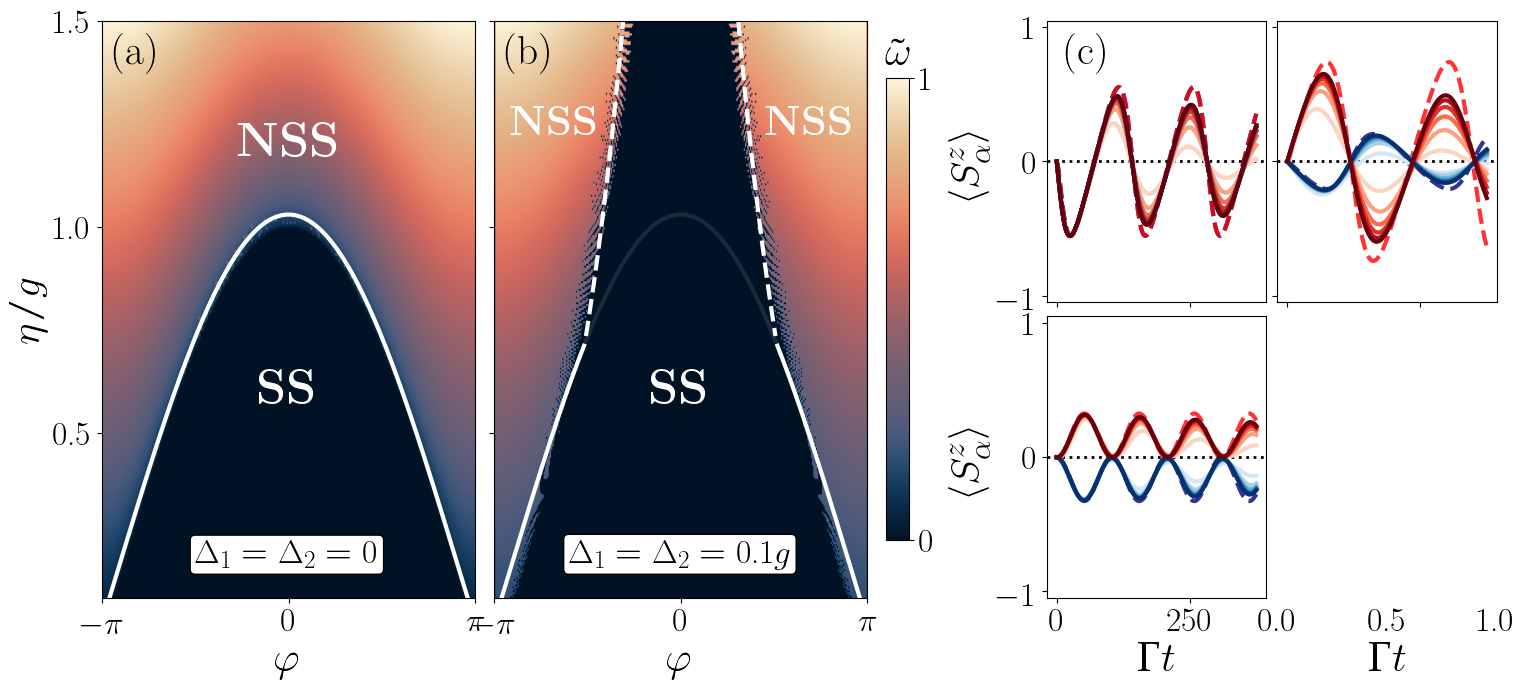

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

kappa = 1.0
g = 0.1*kappa
Gamma = 4*g**2/kappa
tim = np.linspace(0, 15/Gamma, 200)  # Fixed time grid

φ_vals = np.linspace(-np.pi, np.pi, 200)   # replace 200 with your actual length
η_vals = np.linspace(0.1*g, 1.5*g, 150)    # match your Julia spacing exactly if known


x = φ_vals / np.pi               # this will go from -1 to +1
y = η_vals / g                   # this will go from 0.1 to 1.5

# Load the two “vars_sz1” files exactly as in Julia
data1 = np.loadtxt("../simul/fourier_sznodet.txt")   
data2 = np.loadtxt("../simul/fourier_szwdet.txt")


data1 = data1.T
data2 = data2.T

# Color limits (matching Julia’s clims1 and clims2)
clims1 = (0.0, 1)
clims2 = (0.0, 1)

# xticks at φ/π = −1,0,1, labeled “–π, 0, π”
xtick_locs   = [-1.0, 0.0, 1.0]
xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

ytick_locs = [0.5, 1.0, 1.5]
ytick_labels = [r"$0.5$", r"$1.0$", r"$1.5$"]


# Choose “lipari” colormap (replace with your actual custom cmap if needed)
# If you defined a custom Lipari colormap elsewhere, import or recreate it here.
# For demonstration I'll just pick “viridis”:
cmap = lipari

# --------------------------------------------
# (2) Load / define all data for panels (c)

phi_list    = [0, 4/5 * np.pi, np.pi]
deltaA_list = [0, 0, 0.01]

# Pre‐load the three sets of mean‐field data:
data1_mf1 = np.loadtxt("../finsize_data/mf_data1s1.txt")
data1_mf2 = np.loadtxt("../finsize_data/mf_data1s2.txt")

data2_mf1 = np.loadtxt("../finsize_data/mf_data2s1.txt")
data2_mf2 = np.loadtxt("../finsize_data/mf_data2s2.txt")

data3_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data3_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")

mf_data_list = [
    (data1_mf1, data1_mf2),
    (data2_mf1, data2_mf2),
    (data3_mf1, data3_mf2),
]


tim = np.linspace(0, 15/Gamma, 200)  # adjust path/name as needed

fig = plt.figure(figsize=(18, 7.5))

# Main grid: 3 rows × 3 columns
gs = gridspec.GridSpec(
    nrows=3, ncols=3, figure=fig,
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    wspace=0.05, hspace=0.05
)

# Panel (a): leftmost column, all rows
ax_a = fig.add_subplot(gs[:, 0])

# Panel (b): middle column, all rows
ax_b = fig.add_subplot(gs[:, 1])

# ---------------------------
# Panel (c) region: instead of
# splitting gs[0,2], gs[1,2], gs[2,2] into three
# rows, we create a 2×2 sub‐GridSpec that lives in gs[:, 2].
# That is, gs[:, 2] spans all three rows in the rightmost column,
# and we carve out a 2×2 inside it.

sub_gs_c = gridspec.GridSpecFromSubplotSpec(
    nrows=2, ncols=2,
    subplot_spec=gs[:, 2],
    hspace=0.05, wspace=0.05
)

# Now create four axes for the 2×2 grid:
ax_c1 = fig.add_subplot(sub_gs_c[0, 0])  # top‐left of the 2×2
ax_c2 = fig.add_subplot(sub_gs_c[0, 1])  # top‐right of the 2×2
ax_c3 = fig.add_subplot(sub_gs_c[1, 0])  # bottom‐left of the 2×2
ax_c4 = fig.add_subplot(sub_gs_c[1, 1])  # bottom‐right of the 2×2 (empty)

# --------------------------------------------
# (4) Plot Panel (a) exactly as before

im_a = ax_a.imshow(
    data1 * 1 / data1.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims1[0],
    vmax=clims1[1]
)

ax_a.set_ylabel(r"$\eta / g$")
ax_a.set_xlabel(r"$\varphi$")
ax_a.set_xticks(xtick_locs)
ax_a.set_xticklabels(xtick_labels)
ax_a.set_yticks(ytick_locs)
ax_a.set_yticklabels(ytick_labels)

fncx = (0.88 * np.cos(1.08 * x * np.pi / 2.0) + 0.15)
ax_a.plot(x, fncx, color="white", linewidth=3)

ax_a.set_ylim(0.1, 1.5)
ax_a.text(
    0.03, 0.98, "(a)",
    transform=ax_a.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)

ax_a.text(
    0.25, 0.05, r"$\mathrm{\Delta_1}=\mathrm{\Delta_2}=0$",
    transform=ax_a.transAxes,
    fontsize=24,
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)

ax_a.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35,
          ha="center", va="center", color="white")
ax_a.text(0.0, 1.2, r"$\mathbf{NSS}$", fontsize=35,
          ha="center", va="center", color="white")

# --------------------------------------------
# (5) Plot Panel (b) exactly as before

im_b = ax_b.imshow(
    data2 * 1 / data2.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims2[0],
    vmax=clims2[1]
)

ax_b.set_xlabel(r"$\varphi$")
ax_b.set_xticks(xtick_locs)
ax_b.set_xticklabels(xtick_labels)

ax_b.set_yticks(ytick_locs)
ax_b.set_yticklabels([])

a = 4.25
b = 5.5
c = -0.25
fncx2 = a * (np.exp(-b * np.abs(x * np.pi / 6))) + c

y_fncx = np.where(fncx > fncx2, fncx, np.nan)
y_fncx2 = np.where(fncx2 > fncx, fncx2, np.nan)

ax_b.plot(x, y_fncx,  color="white", linewidth=3)
ax_b.plot(x, y_fncx2, color="white", linewidth=3, linestyle="--")

mask = fncx <= fncx2
ax_b.plot(x[mask], fncx[mask], color="white", alpha=0.1, linewidth=3)

ax_b.text(
    0.2, 0.05, r"$\mathrm{\Delta_1}=\mathrm{\Delta_2}=0.1g$",
    transform=ax_b.transAxes,
    fontsize=24,
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)

ax_b.set_ylim(0.1, 1.5)

ax_b.text(
    0.03, 0.98, "(b)",
    transform=ax_b.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)

ax_b.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35,
          ha="center", va="center", color="white")
ax_b.text(0.69, 1.25, r"$\mathbf{NSS}$", fontsize=30,
          ha="center", va="center", color="white")
ax_b.text(-0.68, 1.25, r"$\mathbf{NSS}$", fontsize=30,
          ha="center", va="center", color="white")

cbar = fig.colorbar(
    im_b,
    ax=[ax_a, ax_b],
    location="right",
    pad=0.02,
    shrink=0.8
)
cbar.ax.set_title(r"$\,\tilde{\omega}$", pad=10)
cbar.set_ticks([0.0, 1])
cbar.set_ticklabels([r"$0$", r"$1$"])

# --------------------------------------------
# (6) Plot Panels (c1), (c2), (c3) into the new 2×2 grid

# We still loop over our three data‐sets for c1/c2/c3.
axes_c_data = [ax_c1, ax_c2, ax_c3]
ymin, ymax = -1.05, 1.05
yticks    = np.arange(-1, 1.1, 1.0)

for ax_plot, φ, ΔA, (mf1, mf2) in zip(
        axes_c_data,
        phi_list,
        deltaA_list,
        mf_data_list
    ):
    data = np.load(
        f"../finsize_data/spin_dynamics_ϕ{φ}_Delta{ΔA}.npz",
        allow_pickle=True
    )
    N_values = data["N_values"]
    Jz_A     = data["Jz_A"]
    Jz_B     = data["Jz_B"]

    # Plot mean‐field (dashed)
    ax_plot.plot(tim, mf1, lw=3, color="navy", linestyle="--", alpha=0.8)
    ax_plot.plot(tim, mf2, lw=3, color="red",  linestyle="--", alpha=0.8)

    # Zero line
    ax_plot.axhline(0, color="black", lw=2, linestyle=":")

    # Finite‐N curves
    colorlistA = plt.get_cmap("Blues", 1 + len(N_values))
    colorlistB = plt.get_cmap("Reds",  1 + len(N_values))
    for n_idx in range(len(N_values)):
        ax_plot.plot(
            tim,
            Jz_A[n_idx] / N_values[n_idx],
            lw=3,
            color=colorlistA(1 + n_idx)
        )
        ax_plot.plot(
            tim,
            Jz_B[n_idx] / N_values[n_idx],
            lw=3,
            color=colorlistB(1 + n_idx)
        )

    # Only set y‐label for the *left‐column* of the 2×2 (i.e. ax_c1 and ax_c3)
    ax_plot.set_ylabel(r"$\langle S^z_\alpha \rangle$")
    ax_plot.set_ylim(ymin, ymax)
    ax_plot.set_yticks(yticks)

# Now handle x‐labels: only bottom row (ax_c3 and ax_c4)
ax_c3.set_xlabel(r"$\Gamma t$")
ax_c4.set_xlabel(r"$\Gamma t$")

# Turn off x‐tick labels on the top row (ax_c1, ax_c2):
for ax_top in [ax_c1, ax_c2]:
    ax_top.set_xticklabels([])

# For the right‐column of the 2×2 (ax_c2, ax_c4), remove y‐labels and ticks:
for ax_right in [ax_c2, ax_c4]:
    ax_right.set_yticklabels([])
    ax_right.set_ylabel("")  # ensures no y‐label box

# Finally, leave the bottom‐right (ax_c4) blank—no data plotted:
# We’ll simply turn off its tick marks:
ax_c4.tick_params(left=False, bottom=False)
ax_c4.spines['top'].set_visible(False)
ax_c4.spines['right'].set_visible(False)
ax_c4.spines['bottom'].set_visible(False)
ax_c4.spines['left'].set_visible(False)

# Add the big “(c)” label in the top‐left corner of the entire right block:
# (same coordinates as before so that it lines up)
fig.text(
    0.66,            # x‐coordinate 
    0.865,           # y‐coordinate
    "(c)",
    fontsize=30,
    fontweight="bold",
    va="top"
)

# --------------------------------------------
# (7) Final layout adjustments (unchanged)

# plt.savefig("fig2.svg", bbox_inches="tight")
plt.show()
